In [1]:
# # Team - Uncomment this and run this for the first time
# import sys
# print(sys.executable)
# print(sys.version)
# !{sys.executable} -m pip install ipykernel
# !{sys.executable} -m ipykernel install --user --name CIBCT3 --display-name "CIBC_Team3_env"
# !{sys.executable} -m pip install -r ../requirements.txt
# # Once it is run, refresh the notebook and then change the kernel to CIBC_Team3_env

In [2]:
import os
import pandas as pd
import numpy as np
from data_preprocessing import load_config, load_data, preprocess_data, split_data
from model import build_model, train_and_evaluate_model
from evaluation import evaluate_performance
from explainability import shap_explanation, lime_explanation, plot_pdp

/h/ws_amisra/.local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load configuration
config = load_config("../config/config.yml")

In [4]:
# Load data
pd.set_option('display.max_columns', None)
df = load_data(config)
df.head(3)

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_13,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,transaction_attribute_17,transaction_attribute_18,transaction_attribute_19,transaction_attribute_20,transaction_attribute_21,transaction_attribute_22,transaction_attribute_23,transaction_attribute_24,transaction_attribute_25,transaction_attribute_26,transaction_attribute_27,transaction_attribute_28,transaction_attribute_29,transaction_attribute_30,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_34,transaction_attribute_35,transaction_attribute_36,transaction_attribute_37,transaction_attribute_38,transaction_attribute_39,transaction_attribute_40,transaction_attribute_41,transaction_attribute_42,transaction_attribute_43,transaction_attribute_44,transaction_attribute_45,transaction_attribute_46,transaction_attribute_47,transaction_attribute_48,transaction_attribute_49,transaction_attribute_50,transaction_attribute_51,transaction_attribute_52,transaction_attribute_53,transaction_attribute_54,transaction_attribute_55,transaction_attribute_56,transaction_attribute_57,transaction_attribute_58,transaction_attribute_59,transaction_attribute_60,transaction_attribute_61,transaction_attribute_62,transaction_attribute_63,transaction_attribute_64,transaction_attribute_65,transaction_attribute_66,transaction_attribute_67,transaction_attribute_68,transaction_attribute_69,transaction_attribute_70,transaction_attribute_71,transaction_attribute_72,transaction_attribute_73,transaction_attribute_74,transaction_attribute_75,transaction_attribute_76,transaction_attribute_77,transaction_attribute_78,transaction_attribute_79,transaction_attribute_80,transaction_attribute_81,transaction_attribute_82,transaction_attribute_83,transaction_attribute_84,transaction_attribute_85,transaction_attribute_86,transaction_attribute_87,transaction_attribute_88,transaction_attribute_89,transaction_attribute_90,transaction_attribute_91,transaction_attribute_92,transaction_attribute_93,transaction_attribute_94,transaction_attribute_95,transaction_attribute_96,transaction_attribute_97,transaction_attribute_98,transaction_attribute_99,transaction_attribute_100,transaction_attribute_101,transaction_attribute_102,transaction_attribute_103,transaction_attribute_104,transaction_attribute_105,transaction_attribute_106,transaction_attribute_107,transaction_attribute_108,transaction_attribute_109,transaction_attribute_110,transaction_attribute_111,transaction_attribute_112,transaction_attribute_113,transaction_attribute_114,transaction_attribute_115,transaction_attribute_116,transaction_attribute_117,transaction_attribute_118,transaction_attribute_119,transaction_attribute_120,transaction_attribute_121,transaction_attribute_122,transaction_attribute_123,transaction_attribute_124,transaction_attribute_125,transaction_attribute_126,transaction_attribute_127,transaction_attribute_128,transaction_attribute_129,transaction_attribute_130,transaction_attribute_131,transaction_attribute_132,transaction_attribute_133,transaction_attribute_134,transaction_attribute_135,transaction_attribute_136,transaction_attribute_137,transaction_attribute_138,transaction_attribute_139,transaction_attribute_140,transaction_attribute_141,transaction_attribute_142,transaction_attribute_143,transaction_attribute_144,transaction_attribute_145,transaction_attribute_146,transaction_attribute_147,transaction_attribute_148,transaction_attribute_149,transaction_attribute_150,transaction_attribute_151,transaction_attribute_152,transaction_attribute_153,transaction_attribute_154,transaction_attribute_155,transaction_attribute_156,transactio

In [5]:
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

num_rows_with_nan = df.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

Total number of rows: 96806
Number of rows with NaN values: 96806


In [14]:
# Preprocess data
df = preprocess_data(df)
df.head(3)

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_13,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,transaction_attribute_17,transaction_attribute_18,transaction_attribute_19,transaction_attribute_20,transaction_attribute_21,transaction_attribute_22,transaction_attribute_23,transaction_attribute_24,transaction_attribute_25,transaction_attribute_26,transaction_attribute_27,transaction_attribute_28,transaction_attribute_29,transaction_attribute_30,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_34,transaction_attribute_35,transaction_attribute_36,transaction_attribute_37,transaction_attribute_38,transaction_attribute_39,transaction_attribute_40,transaction_attribute_41,transaction_attribute_42,transaction_attribute_43,transaction_attribute_44,transaction_attribute_45,transaction_attribute_46,transaction_attribute_47,transaction_attribute_48,transaction_attribute_49,transaction_attribute_50,transaction_attribute_51,transaction_attribute_52,transaction_attribute_53,transaction_attribute_54,transaction_attribute_55,transaction_attribute_56,transaction_attribute_57,transaction_attribute_58,transaction_attribute_59,transaction_attribute_60,transaction_attribute_61,transaction_attribute_62,transaction_attribute_63,transaction_attribute_64,transaction_attribute_65,transaction_attribute_66,transaction_attribute_67,transaction_attribute_68,transaction_attribute_69,transaction_attribute_70,transaction_attribute_71,transaction_attribute_72,transaction_attribute_73,transaction_attribute_74,transaction_attribute_75,transaction_attribute_76,transaction_attribute_77,transaction_attribute_78,transaction_attribute_79,transaction_attribute_80,transaction_attribute_81,transaction_attribute_82,transaction_attribute_83,transaction_attribute_84,transaction_attribute_85,transaction_attribute_86,transaction_attribute_87,transaction_attribute_88,transaction_attribute_89,transaction_attribute_90,transaction_attribute_91,transaction_attribute_92,transaction_attribute_93,transaction_attribute_94,transaction_attribute_95,transaction_attribute_96,transaction_attribute_97,transaction_attribute_98,transaction_attribute_99,transaction_attribute_100,transaction_attribute_101,transaction_attribute_102,transaction_attribute_103,transaction_attribute_104,transaction_attribute_105,transaction_attribute_106,transaction_attribute_107,transaction_attribute_108,transaction_attribute_109,transaction_attribute_110,transaction_attribute_111,transaction_attribute_112,transaction_attribute_113,transaction_attribute_114,transaction_attribute_115,transaction_attribute_116,transaction_attribute_117,transaction_attribute_118,transaction_attribute_119,transaction_attribute_120,transaction_attribute_121,transaction_attribute_122,transaction_attribute_123,transaction_attribute_124,transaction_attribute_125,transaction_attribute_126,transaction_attribute_127,transaction_attribute_128,transaction_attribute_129,transaction_attribute_130,transaction_attribute_131,transaction_attribute_132,transaction_attribute_133,transaction_attribute_134,transaction_attribute_135,transaction_attribute_136,transaction_attribute_137,transaction_attribute_138,transaction_attribute_139,transaction_attribute_140,transaction_attribute_141,transaction_attribute_142,transaction_attribute_143,transaction_attribute_144,transaction_attribute_145,transaction_attribute_146,transaction_attribute_147,transaction_attribute_148,transaction_attribute_149,transaction_attribute_150,transaction_attribute_151,transaction_attribute_152,transaction_attribute_153,transaction_attribute_154,transaction_attribute_155,transaction_attribute_156,transactio

In [7]:
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

num_rows_with_nan = df.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

Total number of rows: 96806
Number of rows with NaN values: 0


In [8]:
# print("NaNs in df:", df.isnull().sum().sum())
# print("Infs in df:", np.isinf(df).sum().sum())

In [9]:
# df.fillna(0, inplace=True)

In [10]:
# Split data
X_train, X_test, y_train, y_test = split_data(df, config)

In [11]:
# print(X_train[:2])
X_train.head(2)

,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_13,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,transaction_attribute_17,transaction_attribute_18,transaction_attribute_19,transaction_attribute_20,transaction_attribute_21,transaction_attribute_22,transaction_attribute_23,transaction_attribute_24,transaction_attribute_25,transaction_attribute_26,transaction_attribute_27,transaction_attribute_28,transaction_attribute_29,transaction_attribute_30,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_34,transaction_attribute_35,transaction_attribute_36,transaction_attribute_37,transaction_attribute_38,transaction_attribute_39,transaction_attribute_40,transaction_attribute_41,transaction_attribute_42,transaction_attribute_43,transaction_attribute_44,transaction_attribute_45,transaction_attribute_46,transaction_attribute_47,transaction_attribute_48,transaction_attribute_49,transaction_attribute_50,transaction_attribute_51,transaction_attribute_52,transaction_attribute_53,transaction_attribute_54,transaction_attribute_55,transaction_attribute_56,transaction_attribute_57,transaction_attribute_58,transaction_attribute_59,transaction_attribute_60,transaction_attribute_61,transaction_attribute_62,transaction_attribute_63,transaction_attribute_64,transaction_attribute_65,transaction_attribute_66,transaction_attribute_67,transaction_attribute_68,transaction_attribute_69,transaction_attribute_70,transaction_attribute_71,transaction_attribute_72,transaction_attribute_73,transaction_attribute_74,transaction_attribute_75,transaction_attribute_76,transaction_attribute_77,transaction_attribute_78,transaction_attribute_79,transaction_attribute_80,transaction_attribute_81,transaction_attribute_82,transaction_attribute_83,transaction_attribute_84,transaction_attribute_85,transaction_attribute_86,transaction_attribute_87,transaction_attribute_88,transaction_attribute_89,transaction_attribute_90,transaction_attribute_91,transaction_attribute_92,transaction_attribute_93,transaction_attribute_94,transaction_attribute_95,transaction_attribute_96,transaction_attribute_97,transaction_attribute_98,transaction_attribute_99,transaction_attribute_100,transaction_attribute_101,transaction_attribute_102,transaction_attribute_103,transaction_attribute_104,transaction_attribute_105,transaction_attribute_106,transaction_attribute_107,transaction_attribute_108,transaction_attribute_109,transaction_attribute_110,transaction_attribute_111,transaction_attribute_112,transaction_attribute_113,transaction_attribute_114,transaction_attribute_115,transaction_attribute_116,transaction_attribute_117,transaction_attribute_118,transaction_attribute_119,transaction_attribute_120,transaction_attribute_121,transaction_attribute_122,transaction_attribute_123,transaction_attribute_124,transaction_attribute_125,transaction_attribute_126,transaction_attribute_127,transaction_attribute_128,transaction_attribute_129,transaction_attribute_130,transaction_attribute_131,transaction_attribute_132,transaction_attribute_133,transaction_attribute_134,transaction_attribute_135,transaction_attribute_136,transaction_attribute_137,transaction_attribute_138,transaction_attribute_139,transaction_attribute_140,transaction_attribute_141,transaction_attribute_142,transaction_attribute_143,transaction_attribute_144,transaction_attribute_145,transaction_attribute_146,transaction_attribute_147,transaction_attribute_148,transaction_attribute_149,transaction_attribute_150,transaction_attribute_151,transaction_attribute_152,transaction_attribute_153,transaction_attribute_154,transaction_attribute_155,transaction_attribute_156,transaction_attribute_157,transact

In [12]:
# Build, train, and evaluate the model
model_config = build_model(config)

In [15]:
model, score, X_train_scaled, X_test_scaled = train_and_evaluate_model(model_config, X_train, y_train, X_test, y_test)
print(f"Test Accuracy: {score}")

Test Accuracy: 0.904400371862411


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [16]:
# Performance evaluation
report, auc = evaluate_performance(model, X_test_scaled, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     19088
           1       0.06      0.36      0.10       274

    accuracy                           0.90     19362
   macro avg       0.52      0.63      0.52     19362
weighted avg       0.98      0.90      0.94     19362

ROC AUC Score: 0.7933594921103028


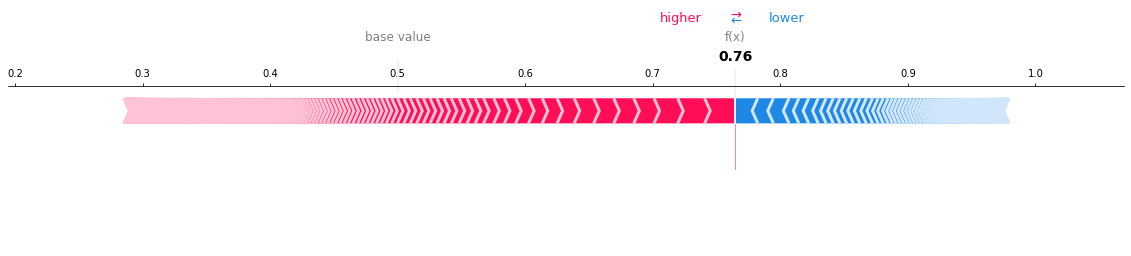

In [17]:
# Generate traditional explainability visualizations for a sample transaction
sample_index = 0
shap_explanation(model, X_train, X_test, sample_index)

# plot_pdp(model, X_train, [0])

In [ ]:
lime_explanation(model, X_train, X_test, sample_index)